In [2]:
import torch
import sys
sys.path.append('../../modules')
from notable_functions import runge_function as fn
from notable_kernels import *
from nn_rbf_poly import RBF_Poly
import matplotlib.pyplot as plt

In [3]:
colors = ['red', 'blue', 'green']
x_ver = torch.linspace(-1, 1, 300).reshape((-1, 1))
y_ver = fn(x_ver)

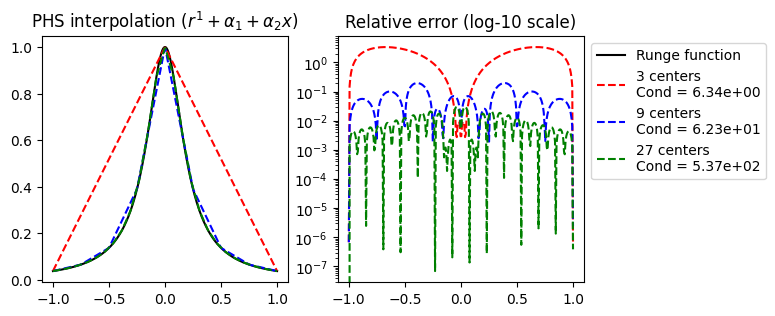

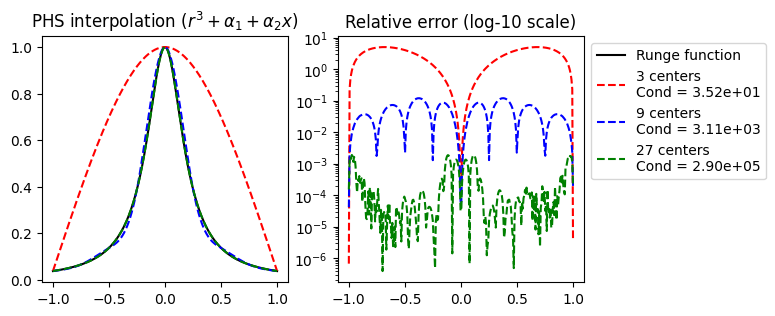

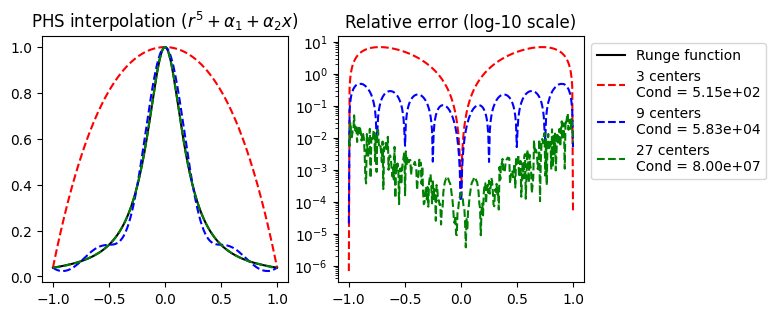

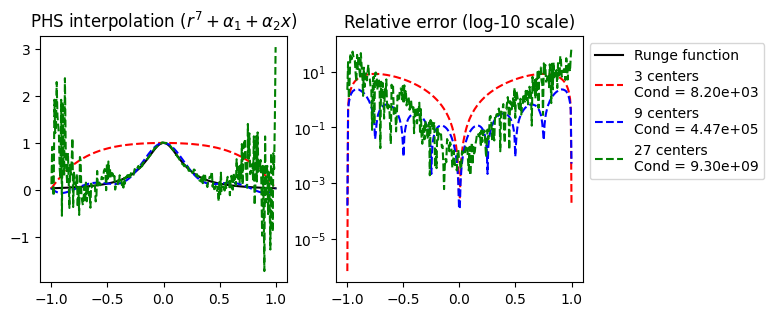

In [5]:
for phs_deg in [1, 3, 5, 7]:
    deg = 1 # degree of accompanying polynomial

    i = 0

    fig = plt.figure(figsize=(7, 3.2))
    plt.subplot(1, 2, 1)
    plt.plot(x_ver, y_ver, color='black', label='Runge function')

    for n in [3, 9, 27]: # number of points
        x = torch.linspace(-1, 1, n).reshape((-1, 1))
        y = fn(x)

        rbf = RBF_Poly(centers = x, degree = deg, kernel = phs_kernel(phs_deg))

        A = rbf.get_interpolation_matrix(x)
        opt_coefs = torch.linalg.solve(A, torch.cat((y, torch.zeros(size=(deg + 1, 1), device=y.device))))
        rbf.set_coefs(opt_coefs[:-(deg+1)].T, opt_coefs[-(deg+1):].T)
        
        with torch.no_grad():
            plt.subplot(1, 2, 1)
            plt.plot(x_ver, rbf(x_ver), color=colors[i], label=f'{n} centers\nCond = {torch.linalg.cond(A):.2e}', linestyle='--')
            plt.subplot(1, 2, 2)
            plt.semilogy(x_ver, torch.abs(rbf(x_ver) - y_ver) / y_ver, color=colors[i], label=f'{n} centers', linestyle='--')
        i += 1
        
    plt.subplot(1,2,1)
    plt.title(rf'PHS interpolation ($r^{phs_deg}+\alpha_1+\alpha_2 x$)')
    handles, labels = plt.gca().get_legend_handles_labels()

    plt.subplot(1, 2, 2)
    plt.title('Relative error (log-10 scale)')
    plt.legend(handles = handles, loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()
    plt.close()